# Natural Language Processing

## Exercise Sheet 2

In [1]:
#imports for all exercises
import nltk
from nltk.corpus import inaugural
from nltk.corpus import wordnet as wn
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.corpus import udhr
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt


### Exercise 1

Plot the conditional frequency distribution of how the usage of the words "men", "women", and "people" has changed over time in the Inaugural Address Corpus.


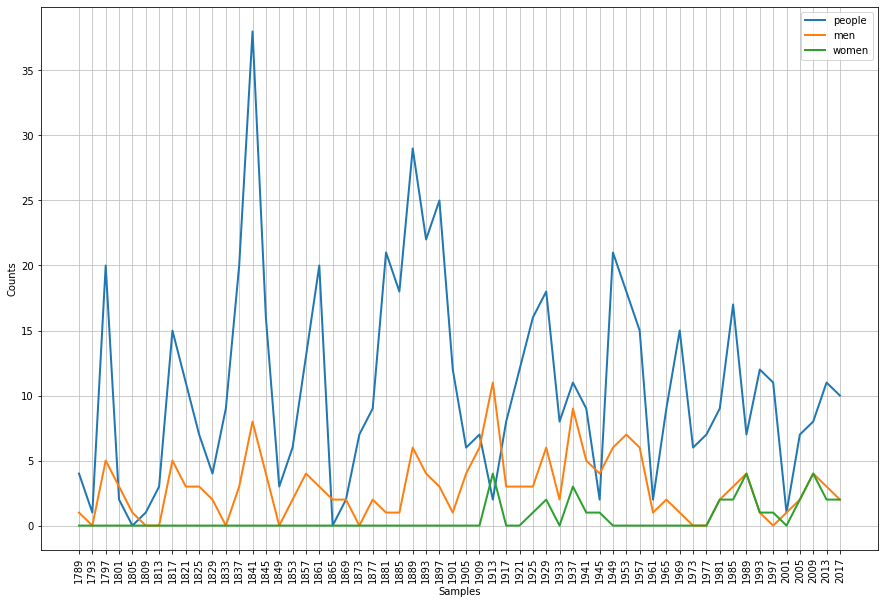

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [2]:
# years = [fileid[:4] for fileid in inaugural.fileids()]
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower().startswith(target))
plt.figure(figsize=(15, 10))
cfd.plot()

### Exercise 2

Plot a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males vs. females.

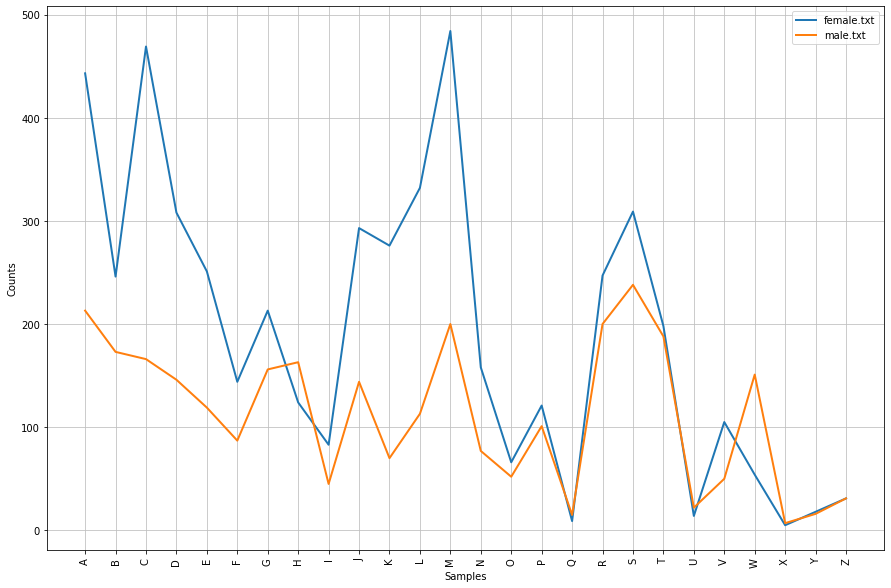

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [3]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0])
    for fileid in names.fileids()
    for name in names.words(fileid))
plt.figure(figsize=(15, 10))
cfd.plot()

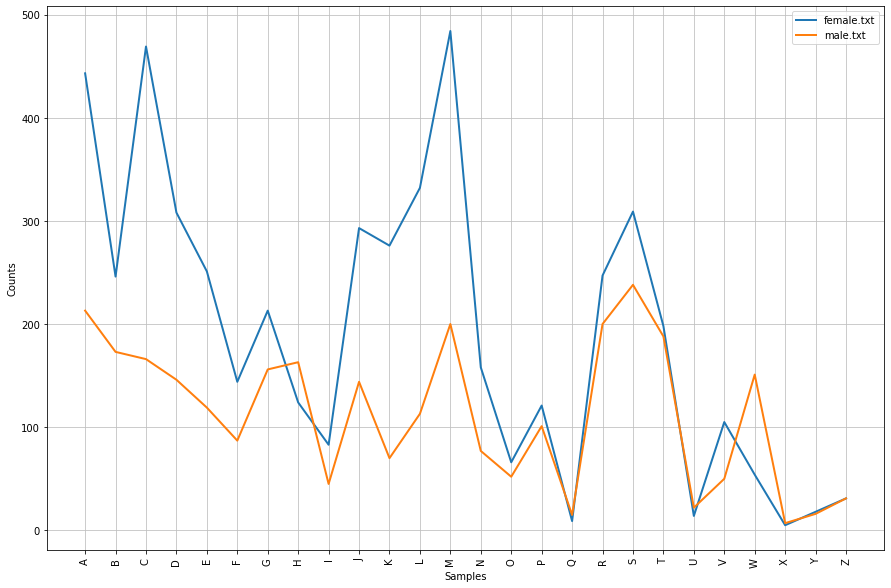

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
cfdist1 = nltk.ConditionalFreqDist()
for fileid in names.fileids():
    for name in names.words(fileid):
        cfdist1[fileid][name[0]] += 1
plt.figure(figsize=(15, 10))
cfdist1.plot()

In [5]:
namescount_female = nltk.corpus.names.words('female.txt')
print(len(namescount_female))
namescount_male = nltk.corpus.names.words('male.txt')
print(len(namescount_male))

5001
2943


In [6]:
cfpdist = nltk.ConditionalProbDist(cfdist1, nltk.UniformProbDist)
cfpdist['female.txt'].prob('Z')

0.038461538461538464

### Exercise 3

What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [7]:
all_hyponyms = len(list(wn.all_synsets('n')))
no_hyponyms = len(list(x for x in wn.all_synsets('n') if not x.hyponyms()))
print(no_hyponyms/all_hyponyms*100)

79.67119283931072


### Exercise 4

Define a function `supergloss(s)` that takes a synset $s$ as its argument and returns a string consisting of the concatenation of the definition of $s$, and the definitions of all the hypernyms and hyponyms of $s$. Apply the function to the synset "car.n.01".

In [8]:
def supergloss(s):
    hypernyms = s.hypernyms()
    hyponyms = s.hyponyms()
    str_hypernyms_def = ", ".join([x.name()+ ': ' + x.definition() for x in hypernyms ])
    str_hyponyms_def = ", ".join([x.name()+ ': ' + x.definition() for x in hyponyms ])
    str_name_def = ": ".join([s.name(), s.definition()])
    return str_name_def + ' | hyponyms: '+ str_hyponyms_def + ' | hypernyms: '+ str_hypernyms_def

In [9]:
supergloss(wn.synset('car.n.01'))

"car.n.01: a motor vehicle with four wheels; usually propelled by an internal combustion engine | hyponyms: ambulance.n.01: a vehicle that takes people to and from hospitals, beach_wagon.n.01: a car that has a long body and rear door with space behind rear seat, bus.n.04: a car that is old and unreliable, cab.n.03: a car driven by a person whose job is to take passengers where they want to go in exchange for money, compact.n.03: a small and economical car, convertible.n.01: a car that has top that can be folded or removed, coupe.n.01: a car with two doors and front seats and a luggage compartment, cruiser.n.01: a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters, electric.n.01: a car that is powered by electricity, gas_guzzler.n.01: a car with relatively low fuel efficiency, hardtop.n.01: a car that resembles a convertible but has a fixed rigid top, hatchback.n.01: a car having a hatchback door, horseless_carriage.n.01: an early ter

### Exercise 5

Define a function to find all words that occur at least $n$ times in the Brown Corpus. Call the function with the value $n=200$.

In [10]:
def word_count(n):
    lower = [w.lower() for w in brown.words()]
    fdist1 = FreqDist(lower)
    return [  w for w in set(lower) if fdist1[w] >= n ]

In [11]:
word_count(200)

['such',
 'about',
 'than',
 'all',
 'office',
 'necessary',
 'military',
 'light',
 'art',
 'was',
 'course',
 'body',
 'whose',
 'say',
 'town',
 'called',
 'problems',
 'shall',
 'might',
 'real',
 'although',
 'available',
 'close',
 'made',
 'under',
 'line',
 'means',
 'has',
 'our',
 'same',
 'off',
 'during',
 'center',
 'side',
 'ever',
 'need',
 ')',
 'government',
 'several',
 'word',
 'used',
 'total',
 "'",
 ',',
 'figure',
 'old',
 'death',
 'as',
 'local',
 'put',
 'study',
 'without',
 'fact',
 'black',
 '``',
 'another',
 'night',
 'heard',
 'must',
 'wife',
 'knew',
 'new',
 'only',
 'best',
 'brought',
 'school',
 'god',
 'what',
 'political',
 'here',
 'white',
 'saw',
 'does',
 'head',
 'use',
 'house',
 'also',
 'whether',
 'he',
 'federal',
 'later',
 'came',
 'leave',
 'long',
 'job',
 'court',
 'these',
 'south',
 'us',
 "didn't",
 'to',
 'whole',
 'making',
 'there',
 'reason',
 'my',
 'before',
 'service',
 'public',
 'make',
 'nothing',
 'therefore',
 'them'

### Exercise 6

Write a program that lists the lexical diversity scores for all Brown Corpus genres, one per line.


In [12]:
# len(text) / len(set(text))
genres = brown.categories()
for genre in genres:
    word_list = brown.words(categories=genre)
    word_set = set(word_list)
    print(genre, ": ", len(word_list)/len(word_set))

adventure :  7.814063556457065
belles_lettres :  9.396666847619565
editorial :  6.22891809908999
fiction :  7.362717695119329
government :  8.570712626818237
hobbies :  6.899455383326351
humor :  4.324297388877816
learned :  10.788777507562726
lore :  7.60525408536165
mystery :  8.188054998567745
news :  6.98582742809504
religion :  6.182174799937235
reviews :  4.718757245536749
romance :  8.284666351159489
science_fiction :  4.475719146303742


### Exercise 7

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. Apply the function to the "news" genre of the Brown Corpus. 



In [13]:
def most_freq(words):
    stopwords_list = stopwords.words('english')
    content = [w for w in words if w.lower() not in stopwords_list]
    fdist1 = FreqDist(content)
    return fdist1.most_common(50)

In [14]:
most_freq(brown.words(categories='news'))

[(',', 5188),
 ('.', 4030),
 ('``', 732),
 ("''", 702),
 ('said', 402),
 (';', 314),
 ('--', 300),
 ('Mrs.', 253),
 ('would', 244),
 ('one', 184),
 (')', 171),
 ('Mr.', 170),
 ('(', 168),
 ('last', 161),
 ('two', 157),
 (':', 149),
 ('new', 148),
 ('first', 143),
 ('year', 138),
 ('home', 127),
 ('also', 120),
 ('made', 107),
 ('years', 102),
 ('time', 97),
 ('three', 97),
 ('New', 93),
 ('state', 90),
 ('?', 90),
 ('President', 89),
 ('week', 86),
 ('could', 86),
 ('four', 73),
 ('man', 72),
 ('House', 71),
 ('back', 69),
 ('members', 69),
 ('American', 67),
 ('may', 66),
 ('program', 66),
 ('work', 66),
 ('get', 66),
 ('Kennedy', 66),
 ('John', 65),
 ('school', 65),
 ('night', 64),
 ('State', 63),
 ('meeting', 62),
 ('since', 61),
 ('per', 61),
 ('day', 61)]

### Exercise 8

Write a function that finds the 50 most frequently occurring bigrams of a text, omitting bigrams that contain stopwords. Apply the function to the "news" genre of the Brown Corpus. 


In [15]:
def most_freq_bigram(words):
    stopwords_list = stopwords.words('english')
    content = [w for w in words if w.lower() not in stopwords_list]
    bigram = nltk.bigrams(content)
    fdist1 = FreqDist(bigram)
    return fdist1.most_common(50)

In [16]:
most_freq_bigram(brown.words(categories='news'))

[(("''", '.'), 294),
 (('.', '``'), 245),
 (("''", ','), 199),
 ((';', ';'), 157),
 ((',', '``'), 122),
 ((',', 'said'), 114),
 ((',', 'Mrs.'), 84),
 (('said', '.'), 78),
 (('said', ','), 74),
 (('.', 'Mr.'), 65),
 (('New', 'York'), 52),
 (('per', 'cent'), 50),
 ((':', '``'), 46),
 (('.', 'Mrs.'), 46),
 (('?', '?'), 45),
 (('Mr.', 'Mrs.'), 42),
 (('year', '.'), 37),
 (('United', 'States'), 37),
 ((',', 'Mr.'), 37),
 ((',', 'however'), 33),
 (('.', ','), 31),
 (('last', 'year'), 31),
 (('however', ','), 30),
 ((',', 'would'), 30),
 (('White', 'House'), 29),
 (('last', 'week'), 29),
 (('Jr.', ','), 28),
 (('.', 'said'), 27),
 (('week', '.'), 26),
 ((')', '--'), 26),
 ((',', ','), 25),
 ((',', 'says'), 23),
 ((')', '.'), 23),
 (('home', 'runs'), 23),
 (('.', '('), 22),
 ((',', 'according'), 22),
 ((',', 'one'), 22),
 (('.', 'One'), 22),
 ((',', 'two'), 21),
 ((',', 'also'), 21),
 (('.', 'also'), 20),
 (("''", '?'), 20),
 (('year', ','), 20),
 (('U.', 'S.'), 20),
 (('.', 'first'), 20),
 ((

### Exercise 9

Write a function `word_freq()` that takes a word and the name of a Brown Corpus genre as arguments, and computes the frequency of the word in that section of the corpus. Use the function to compute the frequency of "love" in "news" vs. "romance" genre.

In [17]:
def word_freq(word, genre):
    content = brown.words(categories=genre)
    fdist1 = FreqDist(content)
    return fdist1.freq(word)

news:  2.9834715675159617e-05   romance:  0.0004569992288138014
ratio of romance over news:  15.317700151380993


<BarContainer object of 2 artists>

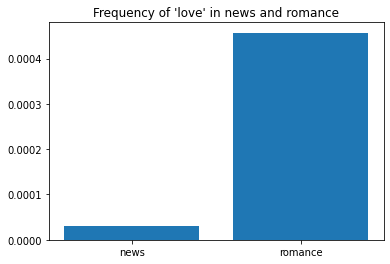

In [18]:
x = ['news', 'romance']
a = word_freq('love', 'news')
b = word_freq('love', 'romance')
y = [a, b]
print('news: ', a, ' ' , 'romance: ', b)
print('ratio of romance over news: ', b/a)
plt.title("Frequency of 'love' in news and romance")
plt.bar(x,y)

### Exercise 10

Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the Universal Declaration of Human Rights Corpus and limit your searches to files in the Latin-1 encoding. Use the function to find the languages for the string "basis".


In [19]:
def find_language(string):
    file_list = [x for x in udhr.fileids() if x.endswith('Latin1')]
    lang_list = [lang for lang in file_list if string in udhr.words(lang)]
    return lang_list
        

In [20]:
find_language('basis')

['Afrikaans-Latin1', 'English-Latin1']

### Exercise 11

What is the branching factor of the noun hypernym hierarchy, i.e. for every noun synset that has hyponyms, how many do they have on average? 

In [21]:
with_hyponim = [len(x.hyponyms()) for x in wn.all_synsets('n') if x.hyponyms() ]
sum(with_hyponim)/len(with_hyponim)

4.543820763194153